In [154]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Tent Map

In [103]:
def tent_map(x, c=2):
    if 0.0 <= x < 0.5:
        return c * x
    elif 0.5 <= x < 1:
        return c * (1 - x)
    else:
        return x

a. For $c = 2$ sketch graphical iterations (cobweb diagram) for the initial conditions $x_0 \in \{\frac{1}{4}, \frac{1}{6}, \frac{5}{7}, \frac{1}{19}\}$. Find the fixed points and the periodic cycles of period 2, 3, and 4. Give a formula for the number of periodic points of period N.

In [104]:
def iterate_tent_map(x0, num_iterations, c=2):
    iterations = [x0]
    for _ in range(num_iterations):
        x0 = tent_map(x0, c)
        iterations.append(x0)
    return iterations

Plot graphical iterations

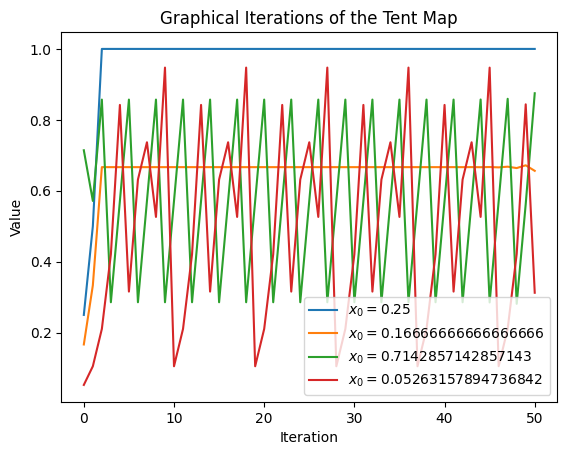

In [105]:
initial_conditions = [1/4, 1/6, 5/7, 1/19]
num_iterations = 50

for x0 in initial_conditions:
    iterations = iterate_tent_map(x0, num_iterations)
    plt.plot(range(num_iterations + 1), iterations, label=f'$x_0 = {x0}$')

plt.title('Graphical Iterations of the Tent Map')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

Find fixed points and periodic cycles

In [106]:
for x0 in initial_conditions:
    iterations = iterate_tent_map(x0, num_iterations, c=2)
    fixed_point = iterations[-1]
    
    # Find periodic cycles
    for period in range(2, 5):
        cycle_candidate = iterations[-period-1:-1]
        if all(x == cycle_candidate[0] for x in cycle_candidate):
            print(f'Initial condition: {x0}')
            print(f'Periodic cycle of period {period}: {cycle_candidate}')
            break

    print(f'Fixed point for initial condition {x0}: {fixed_point}\n')

Initial condition: 0.25
Periodic cycle of period 2: [1.0, 1.0]
Fixed point for initial condition 0.25: 1.0

Fixed point for initial condition 0.16666666666666666: 0.65625

Fixed point for initial condition 0.7142857142857143: 0.875

Fixed point for initial condition 0.05263157894736842: 0.3125



b. For $c = \frac{3}{2}$, plot the graphs of $T(x), T^2(x) = (T \odot T)(x) and T^3(x) = (T \odot T \odot T)(x)$ T)(x) and determine the number of fixed points and periodic points of period 2 and 3.

Iterate and plot $T(x), T^2(x), T^3(x)$

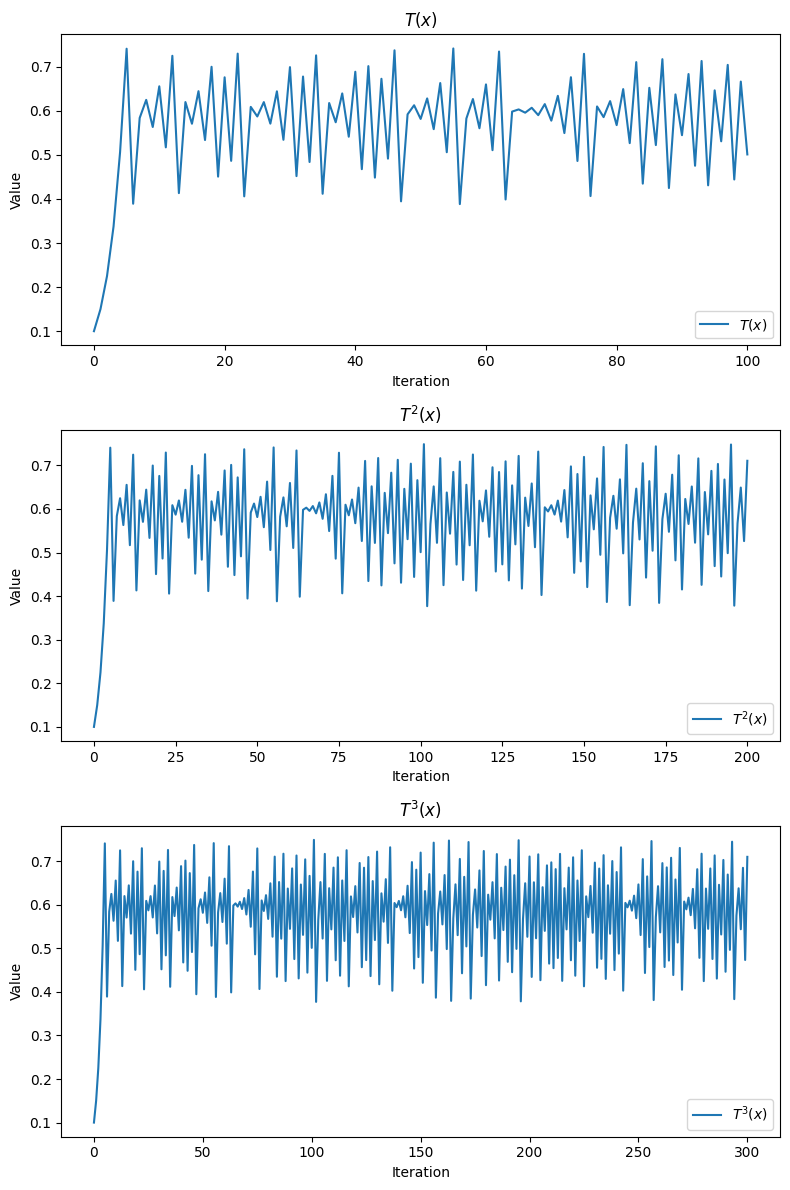

In [107]:
num_iterations = 100
x0 = 0.1

fig, ax = plt.subplots(3, 1, figsize=(8, 12))

iterations_t = iterate_tent_map(x0, num_iterations, c=3/2)
iterations_t2 = iterate_tent_map(x0, 2 * num_iterations, c=3/2)
iterations_t3 = iterate_tent_map(x0, 3 * num_iterations, c=3/2)

# Plot T(x)
ax[0].plot(range(num_iterations + 1), iterations_t, label='$T(x)$')
ax[0].set_title('$T(x)$')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Value')
ax[0].legend()

# Plot T^2(x)
ax[1].plot(range(2 * num_iterations + 1), iterations_t2, label='$T^2(x)$')
ax[1].set_title('$T^2(x)$')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Value')
ax[1].legend()

# Plot T^3(x)
ax[2].plot(range(3 * num_iterations + 1), iterations_t3, label='$T^3(x)$')
ax[2].set_title('$T^3(x)$')
ax[2].set_xlabel('Iteration')
ax[2].set_ylabel('Value')
ax[2].legend()

# Adjust layout for better spacing
plt.tight_layout()

plt.show()

Determine fixed points and periodic points

In [108]:
def find_periodic_points(iterations, period):
    periodic_points = set()
    for i in range(len(iterations) - period):
        if all(iterations[i + j] == iterations[i] for j in range(period)):
            periodic_points.add(iterations[i])
    return periodic_points

In [109]:
fixed_points = set()
period_2_points = find_periodic_points(iterations_t, 2)
period_3_points = find_periodic_points(iterations_t, 3)

print(f'Fixed points: {fixed_points}')
print(f'Periodic points of period 2: {period_2_points}')
print(f'Periodic points of period 3: {period_3_points}')

Fixed points: set()
Periodic points of period 2: set()
Periodic points of period 3: set()


c. Plot a bifurcation diagram for the tent map, considering the bifurcation parameter $c \in (0, 2]$.

In [110]:
def bifurcation_diagram(c_values, iterations, transient):
    bifurcation_points = []

    for c in c_values:
        x = 0.1  # Initial condition
        for _ in range(transient):
            x = tent_map(x, c)
        for _ in range(iterations):
            x = tent_map(x, c)
            bifurcation_points.append((c, x))

    return np.array(bifurcation_points)

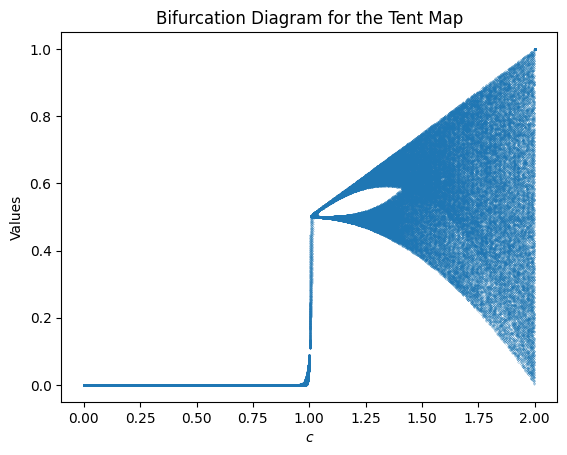

In [111]:
c_values = np.linspace(0, 2, 1000)
iterations = 200
transient = 100

bifurcation_data = bifurcation_diagram(c_values, iterations, transient)

plt.scatter(bifurcation_data[:, 0], bifurcation_data[:, 1], s=0.1, marker='.')
plt.title('Bifurcation Diagram for the Tent Map')
plt.xlabel('$c$')
plt.ylabel('Values')
plt.show()

# Logistic map

Consider the logistic map defined by $f_\mu(x) = \mu x (1 - x)$.

In [149]:
def logistic_map(mu, x):
    return mu * x * (1 - x)

a. for $\mu = 4$, plot the graphs of the functions $f_\mu(x), f^2_\mu(x), f^3_\mu(x)$. Determine the number of fixed points and periodic points of period 2, 3 and 4.

In [142]:
def iterate_logistic_map(x0, num_iterations, mu):
    iterations = [x0]
    for _ in range(num_iterations):
        x0 = logistic_map(mu, x0)
        iterations.append(x0)
    return iterations

Iterate and plot functions $f_\mu(x), f^2_\mu(x), f^3_\mu(x)$

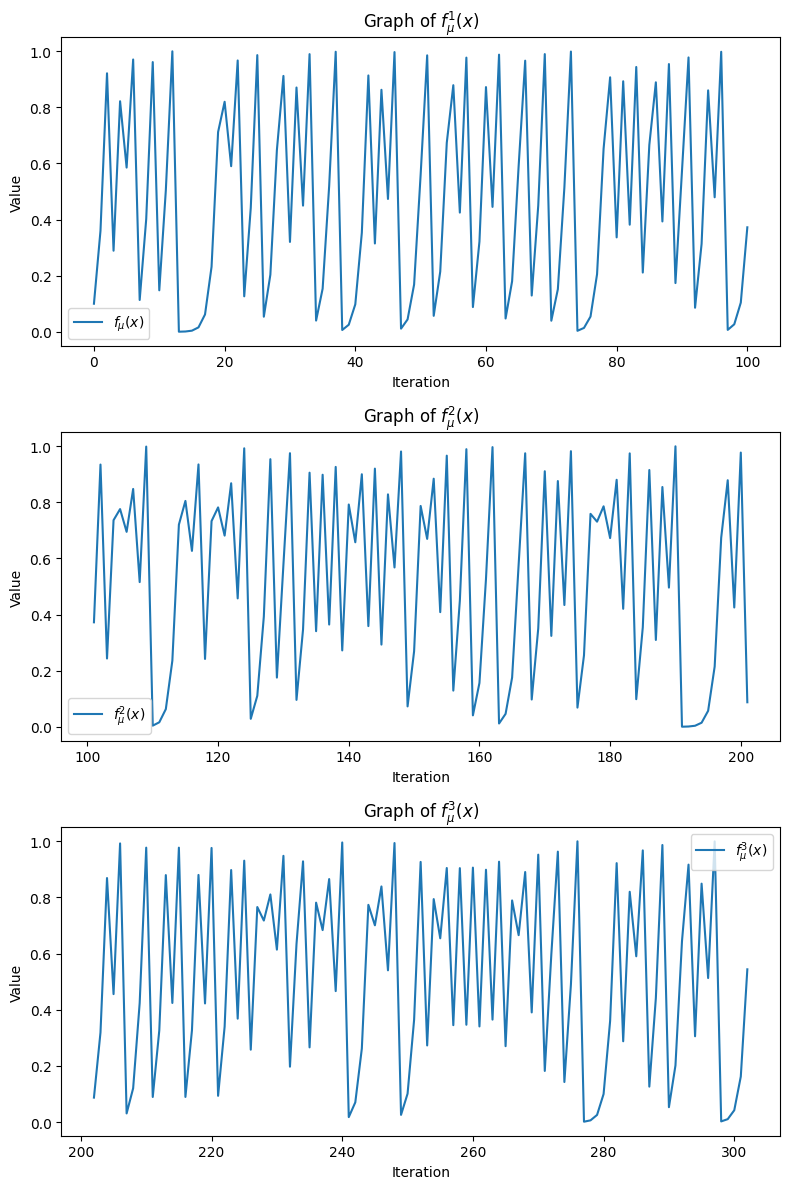

In [143]:
mu = 4
num_iterations = 100
x0 = 0.1

fig, axs = plt.subplots(3, 1, figsize=(8, 12))

iterations_f1 = iterate_logistic_map(x0, num_iterations, mu)
iterations_f2 = iterate_logistic_map(iterations_f1[-1], num_iterations, mu)
iterations_f3 = iterate_logistic_map(iterations_f2[-1], num_iterations, mu)

axs[0].plot(range(num_iterations + 1), iterations_f1, label='$f_\\mu(x)$')
axs[1].plot(range(num_iterations + 1, 2 * num_iterations + 2), iterations_f2, label='$f_\\mu^2(x)$')
axs[2].plot(range(2 * num_iterations + 2, 3 * num_iterations + 3), iterations_f3, label='$f_\\mu^3(x)$')

for i in range(3):
    axs[i].set_title(f'Graph of $f_\\mu^{{ {i+1} }}(x)$')
    axs[i].set_xlabel('Iteration')
    axs[i].set_ylabel('Value')
    axs[i].legend()

plt.tight_layout()
plt.show()


Find fixed points and periodic points of periods 2, 3, and 4.

In [144]:
def find_periodic_points(iterations, period):
    periodic_points = set()
    for i in range(len(iterations) - period):
        if all(iterations[i + j] == iterations[i] for j in range(period)):
            periodic_points.add(iterations[i])
    return periodic_points

In [145]:
fixed_points = set(np.roots([mu, -mu - 1, 1]))

fixed_points = [point.real for point in fixed_points if 0 <= point.real <= 1]

period_2_points = find_periodic_points(iterations_f1, 2)
period_3_points = find_periodic_points(iterations_f1, 3)
period_4_points = find_periodic_points(iterations_f1, 4)

print(f'Fixed points: {fixed_points}')
print(f'Periodic points of period 2: {period_2_points}')
print(f'Periodic points of period 3: {period_3_points}')
print(f'Periodic points of period 4: {period_4_points}')

Fixed points: [0.25, 1.0]
Periodic points of period 2: set()
Periodic points of period 3: set()
Periodic points of period 4: set()


b. Plot a bifurcation diagram for the logistic map, with the bifurcation parameter $\mu \in (0, 4]$.

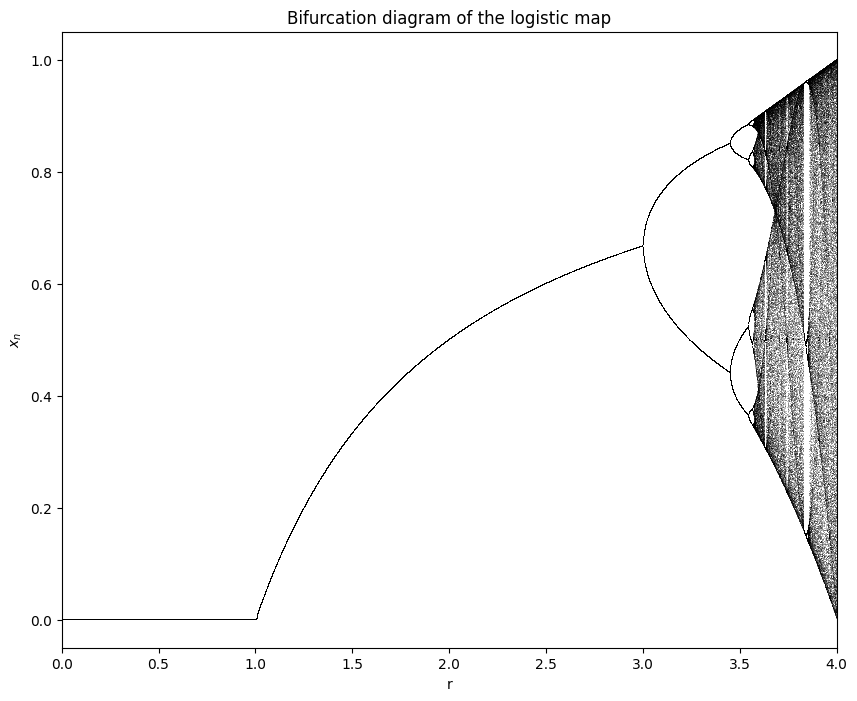

In [150]:
def bifurcation_diagram(samples, iterations, last_iterations):
    """ Generate the bifurcation diagram for the logistic map.

    Parameters:
        samples (int): Number of sample r values.
        iterations (int): Number of iterations per r.
        last_iterations (int): Number of last iterations to display.
    """

    r_values = np.linspace(0.0, 4.0, samples)
    x_values = 1e-5 * np.ones(samples)

    plt.figure(figsize=(10, 8))
    for i in range(iterations):
        x_values = logistic_map(r_values, x_values)
        if i >= (iterations - last_iterations):
            plt.plot(r_values, x_values, ',k', alpha=0.25)

    plt.xlim(0.0, 4.0)
    plt.title("Bifurcation diagram of the logistic map")
    plt.xlabel("r")
    plt.ylabel("$x_n$")
    plt.show()

# Generate the bifurcation diagram
bifurcation_diagram(samples=10000, iterations=1000, last_iterations=100)

c. Consider the dynamical system $x_{n+1} = f_\mu(x_n)$ which may be used to model the population of a certain species of insect. Given that the population size periodically alternates between two distinct values, determine a value of $\mu$ that would be consistent with this
behavior. Determine an equation that gives the points of period two for a general $\mu$ value.

The logistic map $x_{n+1} = f_\mu(x_n) = \mu x_n (1 - x_n)$ can exhibit period-doubling bifurcations, leading to the emergence of periodic behavior, including periods of two. For a bifurcation point where the system transitions from a period-one orbit to a period-two orbit, the values of $x$ alternate between two distinct values.

To find the bifurcation point corresponding to a period-two orbit, we can set $x_{n+2} = x_n$ for the logistic map:

$ f_\mu(f_\mu(x_n)) = x_n $

Substitute $f_\mu(x_n) = \mu x_n (1 - x_n)$:

$ \mu \left( \mu x_n (1 - x_n) \right) \left(1 - \mu x_n (1 - x_n)\right) = x_n \iff -\mu^3x^4_n - x^2_n(\mu^3 + \mu^2) + x_n(\mu^2 - 1) = 0$ 

In [155]:
def equation(mu, xn):
    return -mu**3 * xn**4 - xn**2 * (mu**3 + mu**2) + xn * (mu**2 - 1)

In [156]:
def find_mu(xn_guess):
    mu_guess = 1.0
    mu_solution = fsolve(equation, mu_guess, args=(xn_guess,))
    return mu_solution[0]

In [158]:
xn_value = 1.0  # You can change this value
mu_result = find_mu(xn_value)
print(f"The value of mu consistent with the behavior for x_n = {xn_value} is approximately: {mu_result}")

The value of mu consistent with the behavior for x_n = 1.0 is approximately: -0.7937005259840998
